<a href="https://colab.research.google.com/github/Nardy07/NIDS/blob/main/lst_multi_but_plot_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping


In [2]:
df= pd.read_csv('multi_data.csv')

In [3]:
df

,Unnamed: 0,Src_Port,Dst_Port,Protocol,Bwd_Header_Len,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts,intrusion,DDoS,Normal,U2R,Probe,DoS,BFA,Label
0,0,-0.759847,2.342361,0.057304,0.227105,2.263739,4.590637,0.471796,4.347100,8.173076,2.477885,3,False,True,False,False,False,False,Normal
1,1,1.608301,-0.565280,0.057304,1.008856,7.119662,5.353110,0.980947,5.031255,-0.125103,2.420659,3,False,True,False,False,False,False,Normal
2,2,0.783030,-0.586593,0.057304,-0.014527,0.006001,-0.035646,-0.047994,-0.041103,-0.115746,2.420659,3,False,True,False,False,False,False,Normal
3,3,-0.777205,1.329155,0.057304,-0.051482,-0.164223,-0.281857,-0.053107,-0.296156,-0.154458,2.420615,3,False,True,False,False,False,False,Normal
4,4,1.930986,-0.565280,0.057304,0.063648,0.528413,1.018069,0.008384,0.970252,0.021508,2.420659,3,False,True,False,False,False,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,205162,1.088268,-0.346626,0.057304,-0.018791,-0.158086,-0.269257,-0.053094,-0.281918,-0.154458,-0.415265,5,False,False,True,False,False,False,U2R
205163,205163,1.088312,-0.346626,0.057304,0.026693,-0.153017,-0.244059,-0.053066,-0.257822,-0.087005,-0.415265,5,False,False,True,False,False,False,U2R
205164,205164,1.214003,-0.581893,0.057304,0.003951,-0.156219,-0.248989,-0.053076,-0.262389,-0.125131,-0.408592,5,False,False,True,False,False,False,U2R
205165,205165,1.088268,-0.346626,0.057304,-0.018791,-0.158086,-0.269257,-0.053094,-0.281918,-0.154458,-0.415265,5,False,False,True,False,False,False,U2R


In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df

,Src_Port,Dst_Port,Protocol,Bwd_Header_Len,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts,intrusion,DDoS,Normal,U2R,Probe,DoS,BFA,Label
0,-0.759847,2.342361,0.057304,0.227105,2.263739,4.590637,0.471796,4.347100,8.173076,2.477885,3,False,True,False,False,False,False,Normal
1,1.608301,-0.565280,0.057304,1.008856,7.119662,5.353110,0.980947,5.031255,-0.125103,2.420659,3,False,True,False,False,False,False,Normal
2,0.783030,-0.586593,0.057304,-0.014527,0.006001,-0.035646,-0.047994,-0.041103,-0.115746,2.420659,3,False,True,False,False,False,False,Normal
3,-0.777205,1.329155,0.057304,-0.051482,-0.164223,-0.281857,-0.053107,-0.296156,-0.154458,2.420615,3,False,True,False,False,False,False,Normal
4,1.930986,-0.565280,0.057304,0.063648,0.528413,1.018069,0.008384,0.970252,0.021508,2.420659,3,False,True,False,False,False,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,1.088268,-0.346626,0.057304,-0.018791,-0.158086,-0.269257,-0.053094,-0.281918,-0.154458,-0.415265,5,False,False,True,False,False,False,U2R
205163,1.088312,-0.346626,0.057304,0.026693,-0.153017,-0.244059,-0.053066,-0.257822,-0.087005,-0.415265,5,False,False,True,False,False,False,U2R
205164,1.214003,-0.581893,0.057304,0.003951,-0.156219,-0.248989,-0.053076,-0.262389,-0.125131,-0.408592,5,False,False,True,False,False,False,U2R
205165,1.088268,-0.346626,0.057304,-0.018791,-0.158086,-0.269257,-0.053094,-0.281918,-0.154458,-0.415265,5,False,False,True,False,False,False,U2R


In [6]:
X = df.iloc[:,0:10] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = df[['intrusion']].values # target attribute

In [7]:
X

,Src_Port,Dst_Port,Protocol,Bwd_Header_Len,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts
0,-0.759847,2.342361,0.057304,0.227105,2.263739,4.590637,0.471796,4.347100,8.173076,2.477885
1,1.608301,-0.565280,0.057304,1.008856,7.119662,5.353110,0.980947,5.031255,-0.125103,2.420659
2,0.783030,-0.586593,0.057304,-0.014527,0.006001,-0.035646,-0.047994,-0.041103,-0.115746,2.420659
3,-0.777205,1.329155,0.057304,-0.051482,-0.164223,-0.281857,-0.053107,-0.296156,-0.154458,2.420615
4,1.930986,-0.565280,0.057304,0.063648,0.528413,1.018069,0.008384,0.970252,0.021508,2.420659
...,...,...,...,...,...,...,...,...,...,...
205162,1.088268,-0.346626,0.057304,-0.018791,-0.158086,-0.269257,-0.053094,-0.281918,-0.154458,-0.415265
205163,1.088312,-0.346626,0.057304,0.026693,-0.153017,-0.244059,-0.053066,-0.257822,-0.087005,-0.415265
205164,1.214003,-0.581893,0.057304,0.003951,-0.156219,-0.248989,-0.053076,-0.262389,-0.125131,-0.408592
205165,1.088268,-0.346626,0.057304,-0.018791,-0.158086,-0.269257,-0.053094,-0.281918,-0.154458,-0.415265


In [65]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [66]:
X_train = X_train.values

In [67]:
print(X_train.shape)

(153875, 10)


In [68]:
y_train=np.array(y_train)

In [69]:
num_classes=6
y_train_one_hot = to_categorical(y_train, num_classes)
#y_val_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [70]:
x_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))


In [71]:
x_train.shape

(153875, 1, 10)

# LSTM model defining
first ko pailako save garya model

second ko chai naya layer add garera activation ma softmax used.

third ko ma similar to second tara activation ma chai sigmoid nai use.



In [72]:
#lst = Sequential() # initializing model

# FIRST ONEEE 99% accuracy

# input layer and LSTM layer with 50 neurons
#lst.add(LSTM(units=50,input_dim=10))
 #output layer with sigmoid activation
#lst.add(Dense(1, activation='sigmoid'))

# SECOND ONE 50%

#lst.add(LSTM(units=50, return_sequences=True, input_dim=10))
#lst.add(Dropout(0.2))
#lst.add(LSTM(units=50, return_sequences=True))
#lst.add(Dropout(0.2))
#lst.add(LSTM(units=50))
#lst.add(Dropout(0.2))
#lst.add(Dense(1, activation='softmax')) <-------- esma activation function change garera accuracy ghatna sakya huna sakcha

# THIRD ONE ~99%

#lst = Sequential([LSTM(128, input_dim=10, return_sequences=True),Dropout(0.2),LSTM(128,return_sequences=True),Dropout(0.2),LSTM(128),Dropout(0.2),Dense(num_classes, activation='softmax')])


#4th one
# Define LSTM model with multiple Dense layers
lst = Sequential()
lst.add(LSTM(units=128,return_sequences=True,input_dim=10))
lst.add(LSTM(units=64,return_sequences=True))
lst.add(LSTM(units=64,return_sequences=True))
lst.add(LSTM(units=64))
lst.add(Dense(128, activation='relu'))  # Add first Dense layer
lst.add(Dense(64, activation='relu'))   # Add second Dense layer
lst.add(Dense(num_classes, activation='softmax'))


In [73]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
# summary of model layers
lst.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, None, 128)         71168     
                                                                 
 lstm_16 (LSTM)              (None, None, 64)          49408     
                                                                 
 lstm_17 (LSTM)              (None, None, 64)          33024     
                                                                 
 lstm_18 (LSTM)              (None, 64)                33024     
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 6)                

In [75]:
# training the model on training dataset
history = lst.fit(x_train, y_train_one_hot, epochs=100, batch_size=16,validation_split=0.2)

Epoch 1/100
7694/7694 [==============================] - 55s 6ms/step - loss: 0.0720 - accuracy: 0.9824 - val_loss: 0.0465 - val_accuracy: 0.9886
Epoch 2/100
7694/7694 [==============================] - 47s 6ms/step - loss: 0.0417 - accuracy: 0.9907 - val_loss: 0.0370 - val_accuracy: 0.9913
Epoch 3/100
7694/7694 [==============================] - 48s 6ms/step - loss: 0.0344 - accuracy: 0.9917 - val_loss: 0.0346 - val_accuracy: 0.9903
Epoch 4/100
7694/7694 [==============================] - 48s 6ms/step - loss: 0.0292 - accuracy: 0.9931 - val_loss: 0.0247 - val_accuracy: 0.9939
Epoch 5/100
7694/7694 [==============================] - 49s 6ms/step - loss: 0.0259 - accuracy: 0.9941 - val_loss: 0.0213 - val_accuracy: 0.9958
Epoch 6/100
7694/7694 [==============================] - 49s 6ms/step - loss: 0.0239 - accuracy: 0.9947 - val_loss: 0.0236 - val_accuracy: 0.9942
Epoch 7/100
7694/7694 [==============================] - 50s 6ms/step - loss: 0.0218 - accuracy: 0.9953 - val_loss: 0.0195 -

In [76]:
X_test = X_test.to_numpy()
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [77]:
from keras.models import model_from_json # saving and loading trained model

filepath = 'lst_multi.json'
weightspath = 'lst_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

In [38]:
# load json and create model
json_file = open(filepath, 'r')
loaded_model_json = json_file.read()
json_file.close()
lst = model_from_json(loaded_model_json)

# load weights into new model
lst.load_weights(weightspath)
print("Loaded model from disk")

Loaded model from disk


In [78]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test_one_hot, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

1603/1603 [==============================] - 56s 3ms/step - loss: 0.0216 - accuracy: 0.9978
Test results - Loss: 0.021643362939357758 - Accuracy: 99.78164434432983%


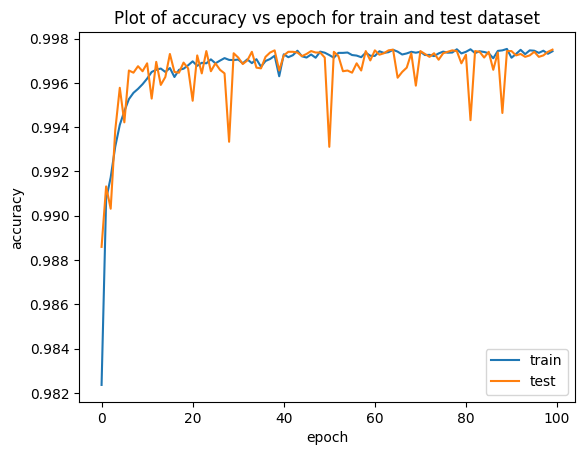

In [80]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('lstm_multi_accuracy.png')
plt.show()

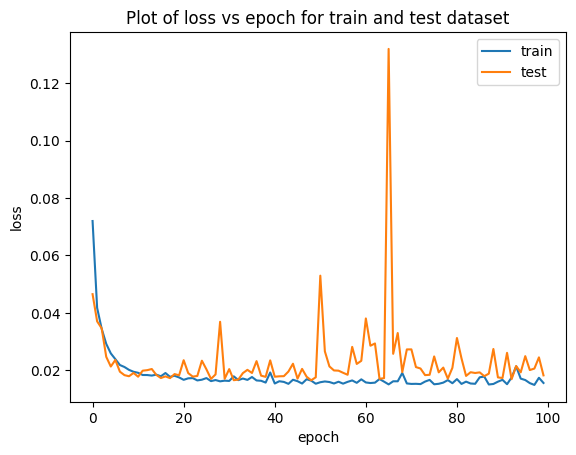

In [81]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('lstm_multi_loss.png')
plt.show()

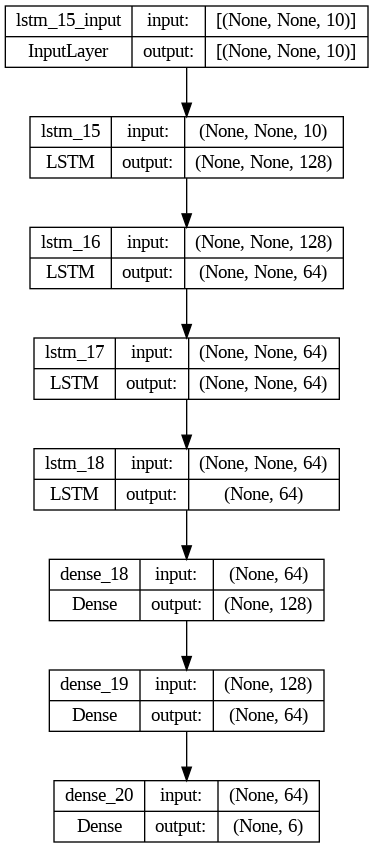

In [82]:
from keras.utils import plot_model
# representation of model layers
plot_model(lst, to_file='lstm_multi.png', show_shapes=True,)

In [83]:
y_test_one_hot.shape

(51292, 6)

In [84]:
y_pred = lst.predict(x_test)

1603/1603 [==============================] - 5s 2ms/step


In [85]:
y_pred.shape

(51292, 6)

In [86]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

1603/1603 [==============================] - 4s 2ms/step


In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [88]:
print("Recall Score - ",recall_score(y_test_one_hot,y_classes,average='micro'))
print("F1 Score - ",f1_score(y_test_one_hot,y_classes,average='micro'))
print("Precision Score - ",precision_score(y_test_one_hot,y_classes,average='micro'))

Recall Score -  0.9977969273960852
F1 Score -  0.9978066541239777
Precision Score -  0.9978163810415083


In [89]:
df1=pd.read_csv('test_dat_try_multi.csv')

In [90]:
df1=df1.drop(df1.columns[0], axis=1)

In [91]:
df1

,src_port,dst_port,protocol,pkt_len_max,pkt_len_mean,bwd_header_len,pkt_len_var,pkt_size_avg,fwd_seg_size_avg,init_bwd_win_byts
0,-0.074113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.523149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.053096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.118154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.064410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.193899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.601078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,-0.063647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1.860801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df1=df1.values
x_val = np.reshape(df1,(df1.shape[0],1,df1.shape[1]))


In [93]:
y_pred_new = lst.predict(x_val)

4/4 [==============================] - 0s 4ms/step


In [94]:
y_pred_labels_new = np.argmax(y_pred_new, axis=1)

In [59]:
y_classes_new = (lst.predict(x_val)>0.5).astype('int32')

4/4 [==============================] - 0s 8ms/step


In [95]:
y_one=to_categorical(y_pred_new, num_classes)

In [99]:
lst.save('lst_multi_trye.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
y_one

array([[[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.